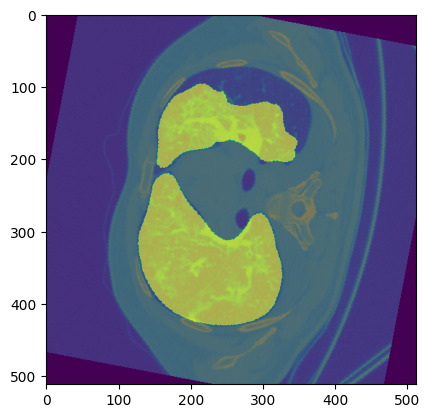

In [118]:
import numpy as np
from PIL import Image
import torch as torch
from torch.utils.data import Dataset,DataLoader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import os
import cv2
from einops import rearrange
from custom_transforms import *
import random
import sys
from torchvision.transforms.functional import to_tensor, hflip, resize,rotate
np.set_printoptions(threshold=np.inf, linewidth=np.inf)
class seg_Dataset(Dataset):
    def __init__(self,path):
        self.path = path

        self.train_path_list = []
        self.train_list = []

        self.label_path_list = []
        self.label_list = []

        self.train_path = path + "/train2"
        self.label_path = path + "/label2"
        
        for file in os.listdir(self.train_path):
            self.train_path_list.append(os.path.join(self.train_path,file))
        self.train_path_list.sort()
            
        for file in os.listdir(self.label_path):
            self.label_path_list.append(os.path.join(self.label_path,file))           
        self.label_path_list.sort()


    def __len__(self):
        return len(self.train_path_list)
        
    def __getitem__(self,idx):
        self.transform = transforms.Compose([customRandomHorizontalFlip(SEED=idx,p=0.5),
                                             transforms.Resize((512,512)),
                                             customRandomRotate(degrees=180,SEED=idx),
                                             transforms.ColorJitter(contrast=3),
                                             #CustomRandomCrop(size=(384,384),SEED=idx),
                                             to_tensor])
        
        image_path = self.train_path_list[idx]
        image = cv2.cvtColor(np.array(Image.open(image_path)),cv2.COLOR_BGR2GRAY)
        image = Image.fromarray(image)
        
        label_path = self.label_path_list[idx]
        label = cv2.cvtColor(np.array(Image.open(label_path)),cv2.COLOR_BGR2GRAY)
        label = Image.fromarray(label)

        input_image = self.transform(image)
        target_image = self.transform(label)

        #thresh = np.zeros_like(target_image)

        #thresh[target_image > 0.04] = 1

        return input_image, target_image
    
if __name__ == "__main__":



    path = "/workspace/test_visual2"
    dataset = seg_Dataset(path=path)    

    train_loader = DataLoader(dataset=dataset,
                        batch_size=1,
                        shuffle=True)
    sample = next(iter(train_loader))
    
    #print(np.array(sample[1]))

    fig, ax = plt.subplots()

    # Show the first image on the axis
    ax.imshow(sample[0].squeeze())

    # Show the second image on top of the first image with alpha blending
    ax.imshow(sample[1].squeeze(), alpha=0.6)

    # Show the final image
    plt.show()



In [119]:
print(sample[1])

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]])
